In [3]:
import numpy as np
from scipy.ndimage import center_of_mass
import imageio.v2 as imageio


image = imageio.imread('exam_02502_f2025_data/pedestrian/CarTraining_Landmarks.png')


human1_landmarks = []
human2_landmarks = []

for i in range(1, 5):
    coords = center_of_mass(image == i)
    human1_landmarks.append(coords)

for i in range(5, 9):
    coords = center_of_mass(image == i)
    human2_landmarks.append(coords)


A = np.array(human1_landmarks)
B = np.array(human2_landmarks)


translation = np.mean(B - A, axis=0)


A_translated = A + translation


ssd = np.sum(np.linalg.norm(A_translated - B, axis=1) ** 2)

print("Sum of Squared Distances (SSD) after optimal translation:", ssd)


Sum of Squared Distances (SSD) after optimal translation: 2081.3571788258905


Q2

In [34]:
import numpy as np
from scipy.ndimage import center_of_mass
import imageio.v2 as imageio


image = imageio.imread('exam_02502_f2025_data/pedestrian/CarTraining_Landmarks.png')


human1_landmarks = []
human2_landmarks = []

for i in range(1, 5):
    coords = center_of_mass(image == i)
    human1_landmarks.append(coords)

for i in range(5, 9):
    coords = center_of_mass(image == i)
    human2_landmarks.append(coords)


A = np.array(human1_landmarks)
B = np.array(human2_landmarks)


translation = np.mean(B - A, axis=0)


A_translated = A + translation


ssd = np.sum(np.linalg.norm(A_translated - B, axis=1) ** 2)

print("Sum of Squared Distances (SSD) after optimal translation:", ssd)


Sum of Squared Distances (SSD) after optimal translation: 2081.3571788258905


In [32]:
import numpy as np
import imageio.v2 as imageio
from scipy.ndimage import center_of_mass


img = imageio.imread("exam_02502_f2025_data/pedestrian/CarTraining_Landmarks.png")


landmark_coords = {}
for i in range(1, 9):
    coords = center_of_mass(img == i)
    landmark_coords[i] = coords


A = np.array([[landmark_coords[i][1], landmark_coords[i][0]] for i in range(1, 5)])
B = np.array([[landmark_coords[i][1], landmark_coords[i][0]] for i in range(5, 9)])


translation = np.mean(B, axis=0) - np.mean(A, axis=0)


abs_tx = abs(translation[0])
print("Absolute value of first component (t_x):", abs_tx)


Absolute value of first component (t_x): 157.17205568794682


Q3

In [5]:
import numpy as np
import imageio.v2 as imageio
from scipy.ndimage import map_coordinates
from math import cos, sin, radians


satellite = imageio.imread('exam_02502_f2025_data/satellite/Satellite_A.png').astype(float)
roi_b = imageio.imread('exam_02502_f2025_data/satellite/ROI_B.png')


coords_b = np.column_stack(np.nonzero(roi_b))


scale_inv = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 1]
])


theta = radians(10)
rot_inv = np.array([
    [cos(theta), -sin(theta), 0],
    [sin(theta),  cos(theta), 0],
    [0, 0, 1]
])


trans_inv = np.array([
    [1, 0, -5],
    [0, 1, -5],
    [0, 0, 1]
])


T_inv = trans_inv @ rot_inv @ scale_inv


coords_hom = np.hstack([coords_b[:, [1, 0]], np.ones((coords_b.shape[0], 1))])


transformed_coords = coords_hom @ T_inv.T
x_src, y_src = transformed_coords[:, 0], transformed_coords[:, 1]


h, w = satellite.shape
valid = (x_src >= 0) & (x_src < w) & (y_src >= 0) & (y_src < h)
x_src = x_src[valid]
y_src = y_src[valid]


sampled_values = map_coordinates(satellite, [y_src, x_src], order=1, mode='reflect')


average_value = np.mean(sampled_values)
print("Average interpolated value from Satellite_A.png:", average_value)


Average interpolated value from Satellite_A.png: 185.84183264936564


Q5

In [33]:
import numpy as np
import imageio.v2 as imageio
from scipy.ndimage import map_coordinates
from math import radians, cos, sin


satellite = imageio.imread("exam_02502_f2025_data/satellite/Satellite_A.png").astype(float)
roi_a = imageio.imread("exam_02502_f2025_data/satellite/ROI_A.png")
roi_b = imageio.imread("exam_02502_f2025_data/satellite/ROI_B.png")


theta = radians(-10)

AT = np.array([
    [1, 0, 5],
    [0, 1, 5],
    [0, 0, 1]
])

AR = np.array([
    [cos(theta), -sin(theta), 0],
    [sin(theta),  cos(theta), 0],
    [0, 0, 1]
])

AS = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])

T = AS @ AR @ AT


coords_a = np.column_stack(np.nonzero(roi_a))  # (y, x)
coords_a_hom = np.hstack([coords_a[:, [1, 0]], np.ones((coords_a.shape[0], 1))])  # (x, y, 1)
transformed_coords = (T @ coords_a_hom.T).T[:, :2]  # (N, 2)


T_inv = np.linalg.inv(T)
coords_b = np.column_stack(np.nonzero(roi_b))
coords_b_hom = np.hstack([coords_b[:, [1, 0]], np.ones((coords_b.shape[0], 1))])
mapped_coords = (T_inv @ coords_b_hom.T).T[:, :2]


x_src = mapped_coords[:, 0]
y_src = mapped_coords[:, 1]
sampled_values = map_coordinates(satellite, [y_src, x_src], order=1, mode='reflect')


print("Interpolated pixel values from Satellite_A at ROI_B positions:", sampled_values)


rounded_transformed = np.round(transformed_coords).astype(int)
print("Rounded transformed ROI_A coordinates:", rounded_transformed)


Interpolated pixel values from Satellite_A at ROI_B positions: [155.54522415 182.24818283 180.31325382 155.59611723 221.89860817
 238.48482429 219.44960969 209.8981957  238.01828623 192.06069525]
Rounded transformed ROI_A coordinates: [[ 87  33]
 [208  30]
 [137  94]]


Q4

In [6]:
import numpy as np
from math import radians, cos, sin


AT = np.array([
    [1, 0, 5],
    [0, 1, 5],
    [0, 0, 1]
])


theta = radians(-10)
AR = np.array([
    [cos(theta), -sin(theta), 0],
    [sin(theta),  cos(theta), 0],
    [0, 0, 1]
])


AS = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])


T = AS @ AR @ AT


element_00 = T[0, 0]

print("Final transformation matrix:\n", T)
print("Value at position (0,0):", element_00)


Final transformation matrix:
 [[ 0.49240388  0.08682409  2.89613983]
 [-0.08682409  0.49240388  2.02789894]
 [ 0.          0.          1.        ]]
Value at position (0,0): 0.492403876506104


Q8

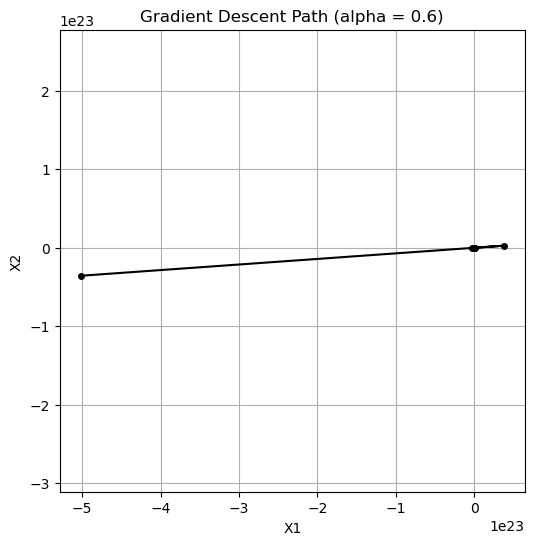

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def f(x1, x2):
    return 12*x1**2 + x1*x2 + 5*x2**2


def grad_f(x1, x2):
    df_dx1 = 24*x1 + x2
    df_dx2 = x1 + 10*x2
    return np.array([df_dx1, df_dx2])


alpha = 0.6
iterations = 20
x = np.array([-15.0, 20.0])
path = [x.copy()]


for _ in range(iterations):
    gradient = grad_f(x[0], x[1])
    x = x - alpha * gradient
    path.append(x.copy())

path = np.array(path)


x1_vals = np.linspace(-20, 20, 400)
x2_vals = np.linspace(-20, 20, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f(X1, X2)

plt.figure(figsize=(6,6))
plt.contour(X1, X2, Z, levels=30, cmap='gray')
plt.plot(path[:,0], path[:,1], 'ko-', markersize=4)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Gradient Descent Path (alpha = 0.6)")
plt.grid(True)
plt.axis('equal')
plt.show()


Q9

In [8]:

import imageio.v2 as imageio
import numpy as np

img = imageio.imread("exam_02502_f2025_data/car_navigation/CarTraining.png")
mask1 = imageio.imread("exam_02502_f2025_data/car_navigation/Class1.png") > 0
mask2 = imageio.imread("exam_02502_f2025_data/car_navigation/Class2.png") > 0
mask_bg = imageio.imread("exam_02502_f2025_data/car_navigation/BG.png") > 0


pixels_class1 = img[mask1]
pixels_class2 = img[mask2]


In [9]:
mean1 = np.mean(pixels_class1, axis=0)
mean2 = np.mean(pixels_class2, axis=0)

bg_range = np.vstack([np.minimum(mean1, mean2), np.maximum(mean1, mean2)])
print("Class 1 mean:", mean1)
print("Class 2 mean:", mean2)
print("Background class range (min–max between Class 1 and Class 2):", bg_range)


Class 1 mean: 180.63541666666666
Class 2 mean: 55.4108040201005
Background class range (min–max between Class 1 and Class 2): [[ 55.41080402]
 [180.63541667]]


In [11]:
import numpy as np
import imageio.v2 as imageio


img = imageio.imread("exam_02502_f2025_data/car_navigation/CarTraining.png")
class1_mask = imageio.imread("exam_02502_f2025_data/car_navigation/Class1.png") > 0
class2_mask = imageio.imread("exam_02502_f2025_data/car_navigation/Class2.png") > 0


img_flat = img.reshape(-1, 3) if img.ndim == 3 else img.reshape(-1, 1)


pixels_class1 = img[class1_mask]
pixels_class2 = img[class2_mask]


mean1 = np.mean(pixels_class1, axis=0)
mean2 = np.mean(pixels_class2, axis=0)


bg_min = np.minimum(mean1, mean2)
bg_max = np.maximum(mean1, mean2)


def is_background(pixel):
    return np.all(pixel >= bg_min) and np.all(pixel <= bg_max)


img_classified = img.copy()
h, w = img.shape[:2]
for y in range(h):
    for x in range(w):
        pixel = img[y, x]
        if is_background(pixel):
            img_classified[y, x] = 255  # white


imageio.imwrite("CarTraining_background_classified.png", img_classified)


Q11

In [12]:
import numpy as np
import imageio.v2 as imageio
from skimage.color import rgb2gray
from math import acos, degrees


A = imageio.imread('exam_02502_f2025_data/animals/ImageA.png')
B = imageio.imread('exam_02502_f2025_data/animals/ImageB.png')


if A.ndim == 3:
    A = rgb2gray(A)
if B.ndim == 3:
    B = rgb2gray(B)


def normalize(img):
    norm = (img - np.mean(img)) / np.std(img)
    return norm + 50

A_norm = normalize(A)
B_norm = normalize(B)


A_sub = A_norm[::2, ::2].flatten()
B_sub = B_norm[::2, ::2].flatten()


dot_product = np.dot(A_sub, B_sub)
norms = np.linalg.norm(A_sub) * np.linalg.norm(B_sub)
ncc = dot_product / norms


angle_deg = degrees(acos(ncc))
print("Angle between the images (degrees):", angle_deg)


Angle between the images (degrees): 1.1200622817233532


Q13

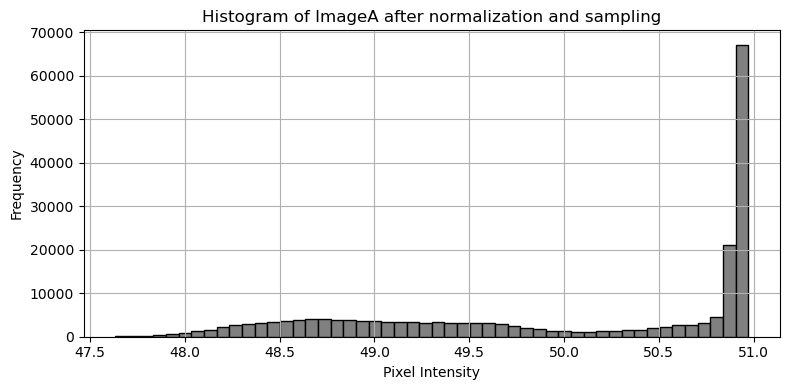

In [13]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from skimage.color import rgb2gray


img = imageio.imread("exam_02502_f2025_data/animals/ImageA.png")


if img.ndim == 3:
    img = rgb2gray(img)


img_normalized = (img - np.mean(img)) / np.std(img) + 50


sampled_pixels = img_normalized[::2, ::2].flatten()


plt.figure(figsize=(8, 4))
plt.hist(sampled_pixels, bins=50, color='gray', edgecolor='black')
plt.title("Histogram of ImageA after normalization and sampling")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


Q14

In [14]:
import numpy as np
import imageio.v2 as imageio
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt


image = imageio.imread("exam_02502_f2025_data/tea_bags/TeaBag.png")


gray = rgb2gray(image)


binary = gray > 0.6


labeled = label(binary)


regions = regionprops(labeled)


count = sum(1 for region in regions if region.perimeter > 15)

print("Number of BLOBs with perimeter > 15:", count)


Number of BLOBs with perimeter > 15: 127


Q15

In [15]:
from skimage.measure import label, regionprops
from skimage.color import rgb2gray
import imageio.v2 as imageio


img = imageio.imread("exam_02502_f2025_data/tea_bags/TeaBag.png")
gray = rgb2gray(img)
binary = gray > 0.6
labeled = label(binary)
regions = regionprops(labeled)


print("Total BLOBs found:", len(regions))


Total BLOBs found: 1016


Q16

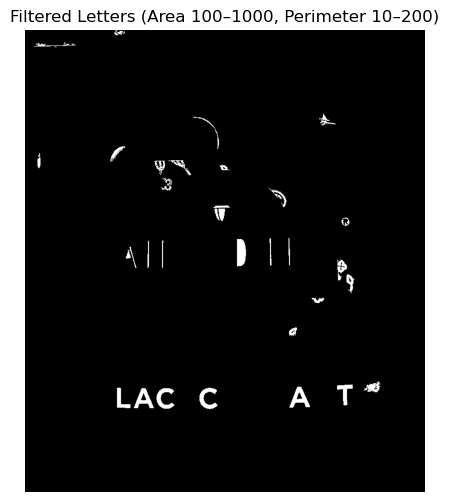

In [16]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.morphology import remove_small_objects


img = imageio.imread("exam_02502_f2025_data/tea_bags/TeaBag.png")
gray = rgb2gray(img)
binary = gray > 0.6


labeled = label(binary)
regions = regionprops(labeled)


mask_filtered = np.zeros_like(binary)

for region in regions:
    if 100 <= region.area <= 1000 and 10 <= region.perimeter <= 200:
        coords = region.coords
        mask_filtered[coords[:, 0], coords[:, 1]] = 1


plt.figure(figsize=(8, 6))
plt.imshow(mask_filtered, cmap='gray')
plt.title("Filtered Letters (Area 100–1000, Perimeter 10–200)")
plt.axis('off')
plt.show()


Q17

In [19]:
import numpy as np
import imageio.v2 as imageio
from skimage.color import rgb2gray


alpha = 0.80
threshold = 0.2


background = rgb2gray(imageio.imread("exam_02502_f2025_data/video/movie_000.jpg"))


for i in range(1, 5):
    frame = rgb2gray(imageio.imread(f"exam_02502_f2025_data/video/movie_{i:03}.jpg"))
    background = (1 - alpha) * background + alpha * frame


new_frame = rgb2gray(imageio.imread("exam_02502_f2025_data/video/movie_005.jpg"))


abs_diff = np.abs(new_frame - background)


change_mask = abs_diff > threshold


num_changed_pixels = np.sum(change_mask)
print("Changed pixels:", num_changed_pixels)


Changed pixels: 3279


Q18

In [20]:
from skimage.measure import label, regionprops


labeled_blobs = label(change_mask)


regions = regionprops(labeled_blobs)
num_blobs = len(regions)

print("Number of BLOBs found:", num_blobs)


Number of BLOBs found: 99


Q19

In [22]:
import numpy as np
import imageio.v2 as imageio
from skimage.color import rgb2gray


alpha = 0.80


background = rgb2gray(imageio.imread("exam_02502_f2025_data/video/movie_000.jpg"))


for i in range(1, 5):
    frame = rgb2gray(imageio.imread(f"exam_02502_f2025_data/video/movie_{i:03}.jpg"))
    background = (1 - alpha) * background + alpha * frame


background_max_value = np.max(background)
print("Maximum pixel value in estimated background image:", background_max_value)


Maximum pixel value in estimated background image: 0.920207616627451


Q20

In [23]:
%matplotlib qt

import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.imshow(change_mask, cmap='gray')
plt.title("Binary Change Mask (Threshold > 0.2)")
plt.axis('off')
plt.show()


Q21

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from sklearn.decomposition import PCA


training_filenames = [
    "1-100.dcm", "1-110.dcm", "1-120.dcm", "1-130.dcm", "1-140.dcm",
    "1-150.dcm", "1-160.dcm", "1-170.dcm", "1-180.dcm", "1-190.dcm", "1-200.dcm"
]


data_dir = "exam_02502_f2025_data/chest_ct/"
training_paths = [os.path.join(data_dir, fname) for fname in training_filenames]


image_vectors = []
for path in training_paths:
    ds = pydicom.dcmread(path)
    img = ds.pixel_array.astype(np.float32)
    image_vectors.append(img.flatten())

X = np.vstack(image_vectors)  # Shape: (11, num_pixels)


X_centered = X - np.mean(X, axis=0)


pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_centered)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', marker='o')
for i, fname in enumerate(training_filenames):
    plt.text(X_pca[i, 0], X_pca[i, 1], fname.split('.')[0], fontsize=8)
plt.title("Projection of CT slices on First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


Q22

In [26]:
import os
import numpy as np
import pydicom
from skimage.morphology import closing, disk
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt


data_dir = "exam_02502_f2025_data/chest_ct"
training_files = [f"1-{i}.dcm" for i in range(100, 201, 10)]
training_imgs = []

for fname in training_files:
    path = os.path.join(data_dir, fname)
    ds = pydicom.dcmread(path)
    img = ds.pixel_array.astype(np.float32)
    training_imgs.append(img)

avg_img = np.mean(training_imgs, axis=0)


binary_avg = (avg_img > 100) & (avg_img < 500)


closed_mask = closing(binary_avg, disk(5))


labeled = label(closed_mask)
filtered_mask = np.zeros_like(closed_mask, dtype=bool)

for region in regionprops(labeled):
    if 2000 <= region.area <= 5000 and 400 <= region.perimeter <= 600:
        for y, x in region.coords:
            filtered_mask[y, x] = True


test_ds = pydicom.dcmread(os.path.join(data_dir, "1-115.dcm"))
test_img = test_ds.pixel_array.astype(np.float32)
test_mask = (test_img > 100) & (test_img < 500)


intersection = np.logical_and(filtered_mask, test_mask).sum()
dice_score = 2 * intersection / (filtered_mask.sum() + test_mask.sum())

print("DICE score:", dice_score)




DICE score: 0.16677423518781465


Q23

In [27]:
import os
import numpy as np
import pydicom
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances


data_dir = "exam_02502_f2025_data/chest_ct"
training_files = [f"1-{i}.dcm" for i in range(100, 201, 10)]
test_file = "1-105.dcm"


train_vectors = []
for fname in training_files:
    img = pydicom.dcmread(os.path.join(data_dir, fname)).pixel_array.astype(np.float32)
    train_vectors.append(img.flatten())

X_train = np.vstack(train_vectors)
mean_train = np.mean(X_train, axis=0)


X_train_centered = X_train - mean_train


pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_centered)


test_img = pydicom.dcmread(os.path.join(data_dir, test_file)).pixel_array.astype(np.float32).flatten()
test_img_centered = test_img - mean_train
test_pca = pca.transform([test_img_centered])


distances = pairwise_distances(test_pca, X_train_pca)
closest_idx = np.argmin(distances)
closest_image = training_files[closest_idx]

print("Closest training image to 1-105.dcm in PCA space:", closest_image)


Closest training image to 1-105.dcm in PCA space: 1-160.dcm


Q24

In [28]:
from skimage.measure import label, regionprops
from skimage.morphology import closing, disk
import pydicom
import numpy as np
import os


data_dir = "exam_02502_f2025_data/chest_ct"
training_files = [f"1-{i}.dcm" for i in range(100, 201, 10)]
training_imgs = []

for fname in training_files:
    path = os.path.join(data_dir, fname)
    img = pydicom.dcmread(path).pixel_array.astype(np.float32)
    training_imgs.append(img)

avg_img = np.mean(training_imgs, axis=0)


binary = (avg_img > 100) & (avg_img < 500)


closed = closing(binary, disk(5))


labeled = label(closed)
regions = regionprops(labeled)
print("Number of BLOBs before filtering:", len(regions))


Number of BLOBs before filtering: 19


Q25

In [30]:
from skimage.measure import label, regionprops
from skimage.morphology import closing, disk
import pydicom
import numpy as np
import os


data_dir = "exam_02502_f2025_data/chest_ct"
training_files = [f"1-{i}.dcm" for i in range(100, 201, 10)]
images = [pydicom.dcmread(os.path.join(data_dir, f)).pixel_array.astype(np.float32) for f in training_files]
avg_img = np.mean(images, axis=0)


binary = (avg_img > 100) & (avg_img < 500)
closed = closing(binary, disk(5))


labeled = label(closed)
regions = regionprops(labeled)


print("Perimeter(s) of filtered BLOB(s):")
for region in regions:
    if 2000 <= region.area <= 5000 and 400 <= region.perimeter <= 600:
        print(region.perimeter)


Perimeter(s) of filtered BLOB(s):
412.5756851698602


* AI was used in parts of  this code and also knowledge from previous exercises throughout the semester.